In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/sahil nawaz alam/Emotion_classify_Data.csv')

In [ ]:
#df = pd.read_csv('/content/Emotion_classify_Data.csv')

In [ ]:
df.head()

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear


In [ ]:
df.Emotion.value_counts()

,count
Emotion,
anger,2000
joy,2000
fear,1937


In [ ]:
df.shape

(5937, 2)

In [ ]:
df.isnull().sum()

,0
Comment,0
Emotion,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5937 entries, 0 to 5936
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  5937 non-null   object
 1   Emotion  5937 non-null   object
dtypes: object(2)
memory usage: 92.9+ KB


In [ ]:
df1 = df.copy()

In [ ]:
df1['Emotion'].replace({'anger': 0,'joy': 1 , "fear":2},inplace=True)

/tmp/ipython-input-3099192156.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Emotion'].replace({'anger': 0,'joy': 1 , "fear":2},inplace=True)
/tmp/ipython-input-3099192156.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['Emotion'].replace({'anger': 0,'joy': 1 , "fear":2},inplace=Tr

In [ ]:
df1.Emotion.value_counts()

,count
Emotion,
0,2000
1,2000
2,1937


In [ ]:
df1.duplicated().sum()

np.int64(0)

In [ ]:
df1['Comment_len']=df1.Comment.apply(len)

In [ ]:
df1['Comment_char']=df1.Comment.apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df1['Comment_sent']=df1.Comment.apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df1.head()

,Comment,Emotion,Comment_len,Comment_char,Comment_sent
0,i seriously hate one subject to death but now ...,2,73,15,1
1,im so full of life i feel appalled,0,34,8,1
2,i sit here to write i start to dig out my feel...,2,131,29,1
3,ive been really angry with r and i feel like a...,1,89,19,1
4,i feel suspicious if there is no one outside l...,2,87,16,1


In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
from nltk.stem.snowball import SnowballStemmer
sb = SnowballStemmer('english')
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y = []
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]

  y.clear()

  for i in text:
     if i not in  stopwords.words('english')and i not in string.punctuation:
        y.append(i)

  text = y[:]
  y.clear()

  for i in text:
     y.append(sb.stem(i))

  return " ".join(y)

In [ ]:
df1['Comment'] = df1['Comment'].apply(transform_text)

In [ ]:
df1

,Comment,Emotion,Comment_len,Comment_char,Comment_sent
0,serious hate one subject death feel reluct drop,2,73,15,1
1,im full life feel appal,0,34,8,1
2,sit write start dig feel think afraid accept p...,2,131,29,1
3,ive realli angri r feel like idiot trust first...,1,89,19,1
4,feel suspici one outsid like raptur happen someth,2,87,16,1
...,...,...,...,...,...
5932,begun feel distress,2,34,7,1
5933,left feel annoy angri think center stupid joke,0,83,16,1
5934,ever get marri everyth readi offer got togeth ...,1,218,45,1
5935,feel reluct appli want abl find compani know l...,2,111,23,1


In [ ]:
from wordcloud import WordCloud
wc= WordCloud(width=1000 , height=1000 , min_font_size=10 , background_color='white')

In [ ]:
from scipy.interpolate import generate_knots
joy_wc =wc.generate(df1[df1['Emotion']==1]['Comment'].str.cat(sep=" "))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


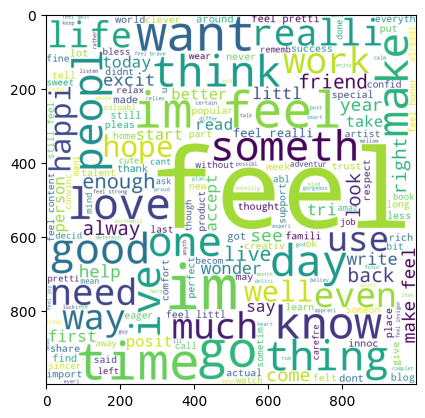

In [ ]:
plt.imshow(joy_wc)

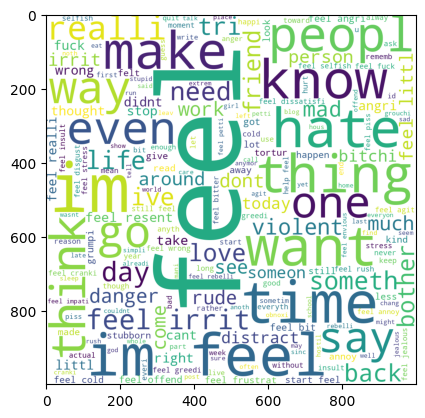

In [ ]:
anger_wc =wc.generate(df1[df1['Emotion']==0]['Comment'].str.cat(sep=" "))
plt.imshow(anger_wc)

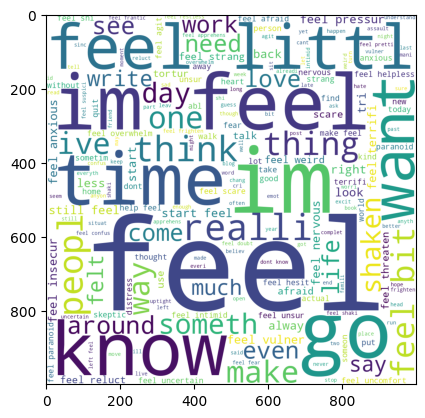

In [ ]:
fear_wc =wc.generate(df1[df1['Emotion']==2]['Comment'].str.cat(sep=" "))
plt.imshow(fear_wc)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [ ]:
x = cv.fit_transform(df1['Comment']).toarray()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
x.shape

(5937, 6234)

In [ ]:
y = df1['Emotion'].values
y

array([2, 0, 2, ..., 1, 2, 0])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB , BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score , classification_report

In [ ]:
x_train , x_test , y_train , y_test  = train_test_split(x, y , test_size=0.2 , random_state=22)

In [ ]:
gnb =GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb =GaussianNB()
gnb.fit(x_train , y_train)
y_pred = gnb.predict(x_test)
print("accuracy_score :",accuracy_score(y_test , y_pred))
print(classification_report(y_test, y_pred))

accuracy_score : 0.5134680134680135
              precision    recall  f1-score   support

           0       0.60      0.40      0.48       409
           1       0.67      0.35      0.46       399
           2       0.43      0.81      0.57       380

    accuracy                           0.51      1188
   macro avg       0.57      0.52      0.50      1188
weighted avg       0.57      0.51      0.50      1188



In [ ]:
mnb = MultinomialNB()
mnb.fit(x_train , y_train)
y_pred = mnb.predict(x_test)
print("accuracy_score :",accuracy_score(y_test , y_pred))
print(classification_report(y_test, y_pred))

accuracy_score : 0.882996632996633
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       409
           1       0.90      0.85      0.87       399
           2       0.86      0.89      0.87       380

    accuracy                           0.88      1188
   macro avg       0.88      0.88      0.88      1188
weighted avg       0.88      0.88      0.88      1188



In [ ]:
bnb = BernoulliNB()
bnb.fit(x_train , y_train)
y_pred = bnb.predict(x_test)
print("accuracy_score :",accuracy_score(y_test , y_pred))
print(classification_report(y_test, y_pred))

accuracy_score : 0.8737373737373737
              precision    recall  f1-score   support

           0       0.88      0.91      0.90       409
           1       0.90      0.83      0.86       399
           2       0.84      0.88      0.86       380

    accuracy                           0.87      1188
   macro avg       0.87      0.87      0.87      1188
weighted avg       0.88      0.87      0.87      1188

